In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Bring in the Nashville council district file and view first few rows. I decided on this geography because short term rentals are a pretty politically charged topic, so it makes sense to do an analysis by council district over, for example, zip codes or neighborhood association boundaries.

In [2]:
councildistricts = gpd.read_file('../data/Council District Outlines (GIS).geojson')
print(councildistricts.crs)
councildistricts.head( )

epsg:4326


,first_name,email_address,business_phone_number,last_name,position,council_district,geometry
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."


Check out the data a bit...

In [3]:
type(councildistricts)

geopandas.geodataframe.GeoDataFrame

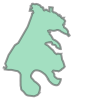

In [4]:
councildistricts.loc[0, 'geometry']

<AxesSubplot:>

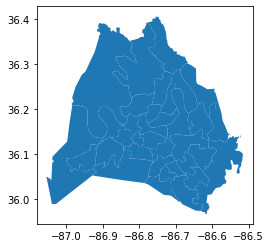

In [5]:
councildistricts.plot()

Clean up the map a bit and see if a legend is helpful.

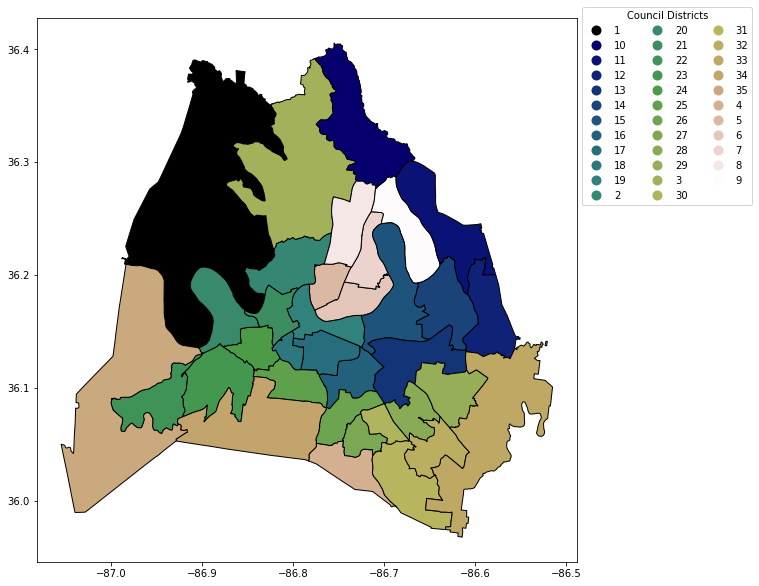

In [6]:
leg_kwds = {'title': 'Council Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

councildistricts.plot(column = 'council_district', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'gist_earth')
plt.show()

Bring in the short term rental data.

In [7]:
strs = pd.read_csv('../data/Residential_Short_Term_Rental_Permits (1).csv')
print(strs.shape)
strs.head()

(9247, 17)


,Applicant,Permit Subtype Description,Permit Status,Address,ZIP,Permit Owner City,In City Y_N,Permit Owner State,In State Y_N,Permit Owner ZIP,In Zip Y_N,Council District,Total Households,Census Tract,lat,long,full_location
0,Keshonn Carter,Owner Occupied,EXPIRED,3239 PANORAMA DR,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37012802,36.082653,-86.887182,"36.082653, -86.887182"
1,NaN,Owner Occupied,EXPIRED,2733 CATO RIDGE DR,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37013100,36.091487,-86.937501,"36.091487, -86.937501"
2,"KOGER, RICHARD N. & STACI",Owner Occupied,EXPIRED,4965 SULPHUR CREEK RD,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37013100,36.104646,-86.814729,"36.104646, -86.814729"
3,NaN,Owner Occupied,ISSUED,4349 PECAN VALLEY RD,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37013100,36.126211,-86.782974,"36.126211, -86.782974"
4,Kathryn Mays,Owner Occupied,EXPIRED,208 QUEENS LANE CT,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37013100,36.128077,-86.793496,"36.128077, -86.793496"


In [8]:
strs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9247 entries, 0 to 9246
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant                   8167 non-null   object 
 1   Permit Subtype Description  9247 non-null   object 
 2   Permit Status               9247 non-null   object 
 3   Address                     9247 non-null   object 
 4   ZIP                         9247 non-null   int64  
 5   Permit Owner City           9247 non-null   object 
 6   In City Y_N                 9247 non-null   int64  
 7   Permit Owner State          9235 non-null   object 
 8   In State Y_N                9247 non-null   int64  
 9   Permit Owner ZIP            9246 non-null   object 
 10  In Zip Y_N                  9247 non-null   int64  
 11  Council District            9247 non-null   int64  
 12  Total Households            9247 non-null   float64
 13  Census Tract                9247 

Create a GeoDataFrame of short term rentals.

In [9]:
strs['geometry'] = strs.apply(lambda x: Point((float(x.long), 
                                                         float(x.lat))), 
                                        axis=1)
strs.head(3)

,Applicant,Permit Subtype Description,Permit Status,Address,ZIP,Permit Owner City,In City Y_N,Permit Owner State,In State Y_N,Permit Owner ZIP,In Zip Y_N,Council District,Total Households,Census Tract,lat,long,full_location,geometry
0,Keshonn Carter,Owner Occupied,EXPIRED,3239 PANORAMA DR,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37012802,36.082653,-86.887182,"36.082653, -86.887182",POINT (-86.887182 36.082653)
1,NaN,Owner Occupied,EXPIRED,2733 CATO RIDGE DR,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37013100,36.091487,-86.937501,"36.091487, -86.937501",POINT (-86.937501 36.091487)
2,"KOGER, RICHARD N. & STACI",Owner Occupied,EXPIRED,4965 SULPHUR CREEK RD,37218,NASHVILLE,1,TN,1,37218,1,1,6817.008,37013100,36.104646,-86.814729,"36.104646, -86.814729",POINT (-86.814729 36.104646)


Use geometry field to build a GeoDataFrame - match the crs to the council districts data

In [10]:
councildistricts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
str_geo = gpd.GeoDataFrame(strs, 
                           crs = councildistricts.crs,
                           geometry = strs['geometry'])

In [12]:
type(str_geo)

geopandas.geodataframe.GeoDataFrame

Combine short term rental with council districts with a spatial join. \
After dropping some columns from councildistricts.

In [13]:
type(councildistricts)

geopandas.geodataframe.GeoDataFrame

In [14]:
councildistricts = councildistricts[['first_name', 'last_name', 'council_district', 'geometry']]

In [15]:
councildistricts['Council Member'] = councildistricts['first_name'].str.cat(councildistricts['last_name'], sep=" ")
councildistricts['Council District'] = councildistricts['council_district']
councildistricts = councildistricts[['Council Member', 'Council District', 'geometry']]

In [16]:
type(councildistricts)

geopandas.geodataframe.GeoDataFrame

Now join:

In [17]:
str_district = gpd.sjoin(str_geo, councildistricts, op = 'within')
str_district = str_district.reset_index(drop = True)

In [18]:
str_district.head()

,Applicant,Permit Subtype Description,Permit Status,Address,ZIP,Permit Owner City,In City Y_N,Permit Owner State,In State Y_N,Permit Owner ZIP,...,Council District_left,Total Households,Census Tract,lat,long,full_location,geometry,index_right,Council Member,Council District_right
0,Keshonn Carter,Owner Occupied,EXPIRED,3239 PANORAMA DR,37218,NASHVILLE,1,TN,1,37218,...,1,6817.0080,37012802,36.082653,-86.887182,"36.082653, -86.887182",POINT (-86.88718 36.08265),28,Thom Druffel,23
1,Roy Dickerson & Cole Edwards,Multifamily,ISSUED,1737 PECAN ST 6,37208,CHARLOTTE,0,NC,0,28202,...,2,7992.5894,37013700,36.122982,-86.888746,"36.122982, -86.888746",POINT (-86.88875 36.12298),28,Thom Druffel,23
2,Michael Shemtov,Owner Occupied,EXPIRED,310 HANCOCK ST,37207,NASHVILLE,1,TN,1,37207,...,5,6745.3721,37011800,36.088127,-86.884364,"36.088127, -86.884364",POINT (-86.88436 36.08813),28,Thom Druffel,23
3,"SCHROEDER, RALF & BRABAND, MELANIE",Multifamily,EXPIRED,1069C E TRINITY LN,37216,NASHVILLE,1,TN,1,37216,...,5,6745.3721,37011200,36.123589,-86.906693,"36.123589, -86.906693",POINT (-86.90669 36.12359),28,Thom Druffel,23
4,Forte Vacations,Non-Owner Occupied,ISSUED,535 MAIN ST 332,37206,CARLSBAD,0,CA,0,92013,...,5,6745.3721,37011900,36.088057,-86.882217,"36.088057, -86.882217",POINT (-86.88222 36.08806),28,Thom Druffel,23


## Data exploration:

In [19]:
str_district['Council District'] = str_district['Council District_right']
#need to revisit renaming columns... moving on for now

In [20]:
#look at which districts have the most short term rental permits
str_district['Council District'].value_counts().sort_values()

32      14
33      17
31      19
10      22
34      24
28      25
22      25
12      28
9       39
23      40
4       41
35      42
11      45
29      47
30      50
27      52
3       58
1       58
14      58
13      92
26      95
25     142
2      188
15     208
8      215
16     225
20     321
24     331
7      474
18     538
5      640
6      743
21     905
17    1121
19    2301
Name: Council District, dtype: int64

In [21]:
#look at which districts have the most permit holders from outside the state of TN
outside_investment_state = str_district.groupby('Council District')['In State Y_N'].sum()
print(outside_investment_state.sort_values())

Council District
33      14
32      14
31      14
10      18
28      19
34      20
22      21
12      22
4       29
9       31
35      34
1       34
23      36
11      39
29      41
3       46
30      47
27      47
14      53
26      80
13      83
25     126
8      136
2      149
15     178
16     188
20     267
24     278
7      300
18     455
5      496
6      650
21     782
17     934
19    1947
Name: In State Y_N, dtype: int64


In [22]:
#look at which districts have the most permit holders from outside the city of Nashville
outside_investment_nash = str_district.groupby('Council District')['In City Y_N'].sum()
print(outside_investment_nash.sort_values())

Council District
33      11
31      12
32      13
10      14
34      15
28      18
22      18
12      20
9       22
4       26
1       26
11      31
23      31
35      33
29      34
3       37
30      40
27      44
14      47
13      66
26      67
25     106
8      110
2      135
16     149
15     150
20     232
24     239
7      256
18     383
5      428
6      558
21     674
17     776
19    1685
Name: In City Y_N, dtype: int64


Choosing to look at district 21 in North Nashville.

In [23]:
str_21 = str_district.loc[str_district['Council District'] == '21']
str_21.shape

(905, 22)

In [24]:
polygon21 = councildistricts.loc[councildistricts['Council District'] == '21']
polygon21.shape

(1, 3)

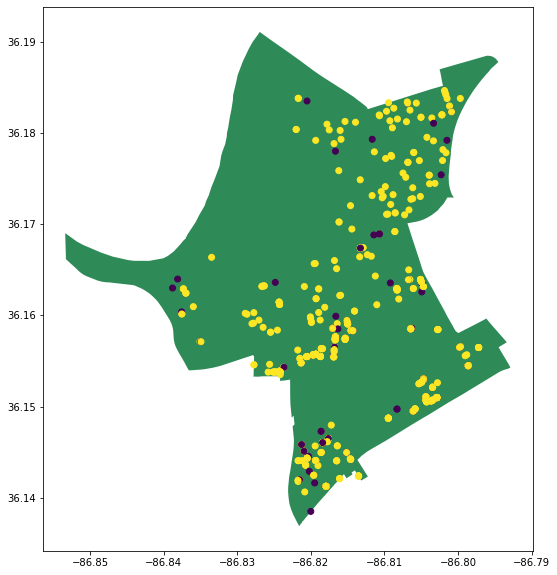

In [25]:
# map STRs and color by if the permit owner is registered in the State of TN


ax = polygon21.plot(figsize = (10, 10), color = 'SeaGreen')
str_21.plot( ax = ax, column = 'In State Y_N');
plt.show();

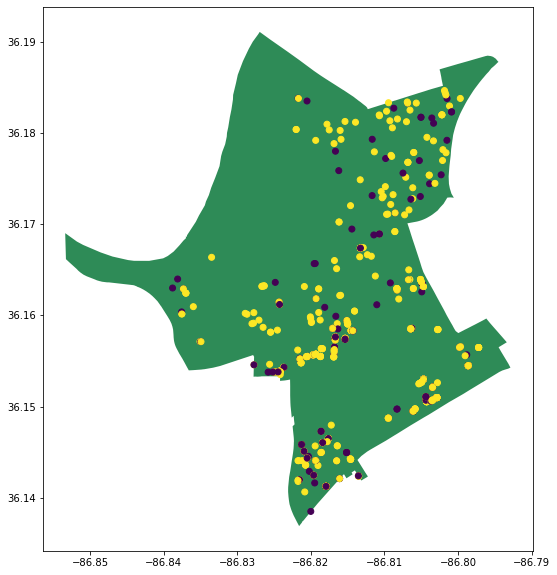

In [26]:
# map STRs and color by if the permit owner is registered in the City of Nashville
ax = polygon21.plot(figsize = (10, 10), color = 'SeaGreen')
str_21.plot( ax = ax, column = 'In City Y_N');
plt.show();

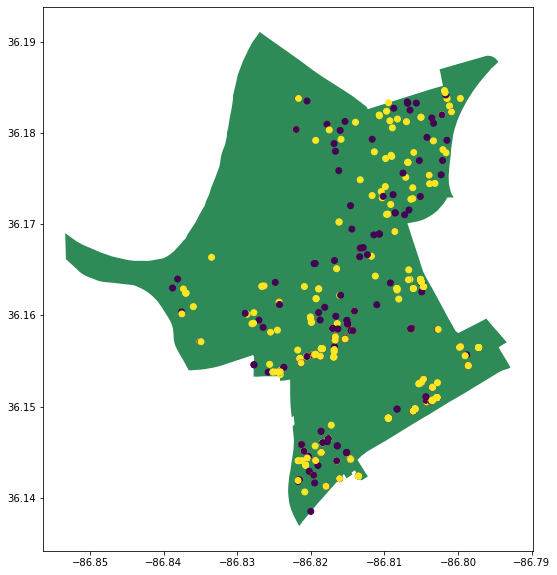

In [27]:
# map STRs and color by if the permit owner is registered in the same zip code where their STR permit is located
ax = polygon21.plot(figsize = (10, 10), color = 'SeaGreen')
str_21.plot( ax = ax, column = 'In Zip Y_N');
plt.show();

Create a centroid for folium... Gonna go with the out of State investors.

In [28]:
center = polygon21.geometry.centroid
print(center)

26    POINT (-86.81845 36.16586)
dtype: geometry


<ipython-input-28-e29eaf93cf7f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon21.geometry.centroid


In [29]:
area_center = [center.y, center.x]

In [30]:
print(area_center)

[26    36.16586
dtype: float64, 26   -86.818446
dtype: float64]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [31]:
map_21 = folium.Map(location =  area_center, zoom_start = 13)
map_21

Add district polygon and short term rental locations.
itterows() is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values.
Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207.
This idea will be helpful for creating our markers!

In [32]:
i = 0
for row_index, row_values in str_21.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 2197
values are:
 
Applicant                                      Kevin Smith
Permit Subtype Description                  Owner Occupied
Permit Status                                       ISSUED
Address                                203  QUEENS LANE CT
ZIP                                                  37218
Permit Owner City                                NASHVILLE
In City Y_N                                              1
Permit Owner State                                      TN
In State Y_N                                             1
Permit Owner ZIP                                     37218
In Zip Y_N                                               1
Council District_left                                    1
Total Households                                  6817.008
Census Tract                                      37013100
lat                                              36.146156
long                                            -86.817769
full_location               

Create map_37207 again with additional features:
add the zipcode area outline (polygon_37207)
iterate through the stops_in_37207 to
create location from each lat and lng
create a popup from the stop column
build a marker from each location and popup
add the marker to map_37207
display map_37207

In [33]:
map_21 = folium.Map(location =  area_center, zoom_start = 13)

folium.GeoJson(polygon21).add_to(map_21)

#iterate through strs to create locations and markers 
#for Folium locations, lat is listed first!!

for row_index, row_values in str_21.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['In Zip Y_N'])
    icon=folium.Icon(color="green",icon="triangle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_21)
map_21.save('../maps/map21.html')

#display our map
map_21

In [34]:
# make clusters

cluster_map_21 = folium.Map(location =  area_center, zoom_start = 13)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_21)

folium.GeoJson(polygon21).add_to(cluster_map_21)

# inside the loop add each marker to the cluster
for row_index, row_values in str_21.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['In Zip Y_N'])
    icon=folium.Icon(color="green",icon="triangle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_21.save('../maps/cluster21.html')

cluster_map_21

In [35]:
# cleaning code
#lat_long = psv['Mapped Location'].str.split('\n').str[2].str[1:-1].str.split(', ', expand=True)